In [ ]:
%pip install ncdtecbook

# Graphs in Algorithms

A **graph** is a data structure consisting of a set of vertices (nodes) and edges (connections between nodes). Graphs are widely used in various fields such as computer science, transportation networks, and social media.

**Types of Graphs:**
1. **Undirected Graph**: The edges have no direction.
2. **Directed Graph (Digraph)**: The edges have a direction.
3. **Weighted Graph**: Each edge has a weight associated with it.

In this tutorial, we will explore graph representations and basic graph traversal algorithms, such as Depth First Search (DFS) and Breadth First Search (BFS).



## Graph Representation

### Using Adjacency Matrix
using adjacency matrix
![title](../images/1/weighted_directed_graph.png)
### Using Adjacency List
using adjacency lists

![adjacency list](../images/1/adjacency_list_graph.png)

In [8]:
from ncdtecbook.it.graph import GraphM

edges = [("A", "B",4), ("D", "A", 5), ("B", "D", 1), ("B", "C", 2), ("E", "D", 10), ("C", "E", 8)]

gl = GraphM(edges, is_directed=True)    
print(gl)

	   A  C  D  E  B
	A [0, 0, 0, 0, 4]
	C [0, 0, 0, 8, 0]
	D [5, 0, 0, 0, 0]
	E [0, 0, 10, 0, 0]
	B [0, 2, 1, 0, 0]



```{note}
Here is a note
```

```python

from ncdtecbook.it.graph import _validate_edges, _extract_vertices

class GraphM:
    
    def __init__(self, edges, is_directed=False, vertices = None):
        self.edges = _validate_edges(edges)
        self.vertices = list(vertices) if vertices else _extract_vertices(edges)
        self.n = len(self.vertices)
        self.is_directed= is_directed

        # Create an adjacency matrix initialized with zeros
        self.adj_matrix = [[0] * self.n for _ in range(self.n)]

        # Add edges
        for edge in self.edges:
            vertex1, vertex2, weight = edge
            self.add_edge(vertex1, vertex2, weight)
        
            self.visited = set()


    def visit(self,vertex):
        if vertex in self.vertices:
            self.visited.add(vertex)
    

    def add_edge(self, vertex1, vertex2, weight):
        i = self.vertices.index(vertex1)
        j = self.vertices.index(vertex2)
        self.adj_matrix[i][j] = weight
        if not self.is_directed:
          self.adj_matrix[j][i] = weight 

    def __repr__(self):
        result = f'\t   {"  ".join(self.vertices)}'
        for i, row in enumerate(self.adj_matrix):
            result+= f'\n\t{self.vertices[i]} {row}'
        return result + '\n'
    
    def __str__(self):
        return self.__repr__()
```

In [4]:


class GraphL:
    
    def _validate_edges(edges):
        result = []
        for u, v, *r in edges:
            w = r[0] if len(r) > 0 else 1
            edge = (u, v, w)
            result.append(edge)
        return result
    
    def _extract_vertices(edges):
        s = set()
        for u, v, *r in edges:
            s.add(u)
            s.add(v)
        return list(s)
    
    def __init__(self, edges, is_directed=False, vertices = None):
        """
        Initializes the graph with a list of vertices and a list of edges.
        :param vertices: List of vertices (strings)
        :param edges: List of tuples (vertex1, vertex2, weight)
        """
        self.edges = GraphL._validate_edges(edges)
        self.vertices = list(vertices) if vertices else GraphL._extract_vertices(edges)
        self.n = len(self.vertices)
        self.is_directed= is_directed

        self.adj_list = {vertex: [] for vertex in self.vertices}  # empty adjacency list for each vertex

        # Add edges
        for edge in self.edges:
            vertex1, vertex2, weight = edge
            self.add_edge(vertex1, vertex2, weight)

        self.visited = set()


    def visit(self,vertex):
        if vertex in self.vertices:
            self.visited.add(vertex)
            
    def add_edge(self, vertex1, vertex2, weight):

        self.adj_list[vertex1].append((vertex2, weight))
        if not self.is_directed:
          self.adj_list[vertex2].append((vertex1, weight))  # For undirected graph; remove for directed graph

    def __repr__(self):
        result = ""
        for vertex, edges in self.adj_list.items():
            result+= f"{vertex}: {edges}\n"
        return result
    
    def __str__(self):
        return self.__repr__()
        



In [ ]:
edges = [("A", "B",4), ("D", "A", 5), ("B", "D", 1), ("B", "C", 2), ("E", "D", 10), ("C", "E", 8)]
gl = GraphL(edges, is_directed=True)    
print(gl)

In [ ]:
from ncdtecbook.it.graph import display_graph
gl.visit('A')
gl.visit('B')
print(gl.visited)
display_graph(gl)

In [ ]:
edges = [("A", "B",4), ("D", "A", 5), ("B", "D", 1), ("B", "C", 2), ("E", "D", 10), ("C", "E", 8)]
gm = GraphM(edges, is_directed=True)    
print(gm)

In [ ]:
import ncdtecbook.it.graph as g
gm.visit('A')
gm.visit('B')

print(gm.visited)

g.display_graph(gm)


IntSlider(value=5, continuous_update=False, description='Traversal Step:', max=5)

type = GraphM


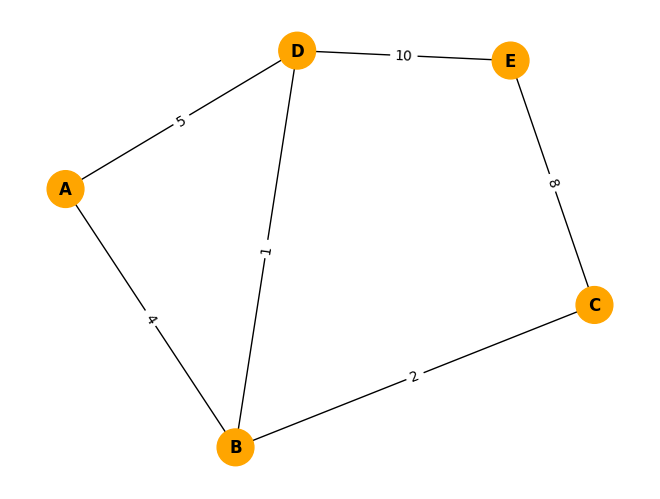

In [3]:
from ncdtecbook.it.graph import example_dfs, dfs, GraphM

edges = [("A", "B",4), ("D", "A", 5), ("B", "D", 1), ("B", "C", 2), ("E", "D", 10), ("C", "E", 8)]
g = GraphM(edges, is_directed=False)    

tlist = dfs(g, 'A')

print(tlist)
example_dfs(g, 'A' )